# Neural network regression

In this many-to-one regression setup, we stack the series from all inverters into a long vector and try to predict the aggregate power a few steps ahead.

## Training

In [1]:
import pandas as pd
from core.preprocessing import make_small_train, make_small_dev
from core.neural_net_forecaster import NeuralNetForecaster

df = pd.read_pickle('data/master_dataset.pkl').fillna(0)

dftrain = make_small_train(df, 'combined')
dfdev = make_small_dev(df)

problem = NeuralNetForecaster(dftrain, dfdev, arch='conv', nepochs=50)

problem.make_forecasts()

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 4378, 64)          256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2189, 64)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2187, 32)          6176      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1093, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 34976)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 36)                1259172   
Total params: 1,265,604
Trainable params: 1,265,604
Non-trainable params: 0
_________________________________________________________________


7776/7776 [==============================] - 108s 14ms/step - loss: 533.1746 - mean_squared_error: 533.1746 - val_loss: 437.8815 - val_mean_squared_error: 437.8815
Iteration 29
(8640, 4380, 1)
Train on 7776 samples, validate on 864 samples
Epoch 1/1
7776/7776 [==============================] - 96s 12ms/step - loss: 509.7763 - mean_squared_error: 509.7763 - val_loss: 568.9722 - val_mean_squared_error: 568.9722
Iteration 30
(8640, 4380, 1)
Train on 7776 samples, validate on 864 samples
Epoch 1/1
7776/7776 [==============================] - 44s 6ms/step - loss: 496.1143 - mean_squared_error: 496.1143 - val_loss: 469.8466 - val_mean_squared_error: 469.8466
Iteration 31
(8640, 4380, 1)
Train on 7776 samples, validate on 864 samples
Epoch 1/1
7776/7776 [==============================] - 43s 6ms/step - loss: 514.4102 - mean_squared_error: 514.4102 - val_loss: 543.4727 - val_mean_squared_error: 543.4727
Iteration 32
(8640, 4380, 1)
Train on 7776 samples, validate on 864 samples
Epoch 1/1
7776/

## Prediction

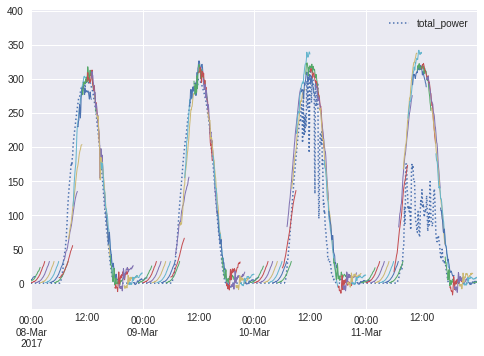

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

problem.plot_test()

ax = plt.gca()
lim = ax.get_xlim()
chunk = (lim[1] - lim[0])/8.
start = lim[0] + 2*chunk
end = lim[0] + 6*chunk

ax.set_xlim(start, end)

plt.show()

In [3]:
problem.calc_mse()

6847.5382672536934